In [1]:
import pandas as pd
import seaborn as sns

In [2]:
mpg = pd.read_csv('./data/데이터시각화/mpg.csv')

In [3]:
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
229,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
230,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
231,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
232,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


<AxesSubplot: xlabel='cty', ylabel='hwy'>

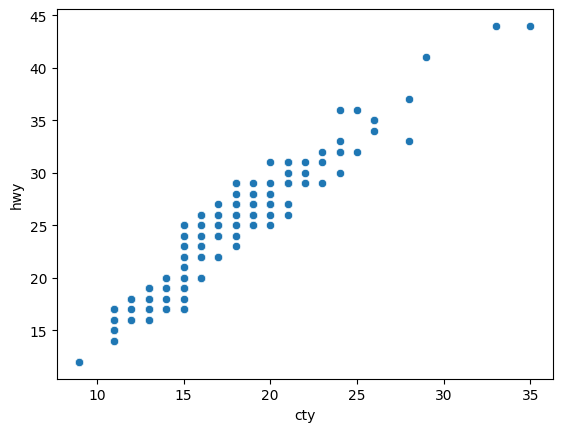

In [10]:
sns.scatterplot(data=mpg,x='cty',y='hwy')

In [13]:
mpg['category'].unique()

array(['compact', 'midsize', 'suv', '2seater', 'minivan', 'pickup',
       'subcompact'], dtype=object)

In [18]:
suv=mpg[mpg['category']=='suv']

In [19]:
suv.groupby('manufacturer').mean()

C:\Users\zxcsu\AppData\Local\Temp\ipykernel_29820\273209032.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  suv.groupby('manufacturer').mean()


,displ,year,cyl,cty,hwy
manufacturer,,,,,
chevrolet,5.600000,2005.000000,8.000000,12.666667,17.111111
dodge,4.971429,2004.142857,7.714286,11.857143,16.000000
ford,4.555556,2002.000000,7.111111,12.888889,17.777778
jeep,4.575000,2005.750000,7.250000,13.500000,17.625000
land rover,4.300000,2003.500000,8.000000,11.500000,16.500000
lincoln,5.400000,2002.000000,8.000000,11.333333,17.000000
mercury,4.400000,2003.500000,7.000000,13.250000,18.000000
nissan,4.050000,2003.500000,6.500000,13.750000,18.000000
subaru,2.500000,2005.000000,4.000000,18.833333,25.000000


In [21]:
mpg.groupby('manufacturer',as_index=False).agg(cty_mean=('cty','mean'))

,manufacturer,cty_mean
0,audi,17.611111
1,chevrolet,15.000000
2,dodge,13.135135
3,ford,14.000000
4,honda,24.444444
5,hyundai,18.642857
6,jeep,13.500000
7,land rover,11.500000
8,lincoln,11.333333
9,mercury,13.250000


<AxesSubplot: xlabel='manufacturer', ylabel='cty_mean'>

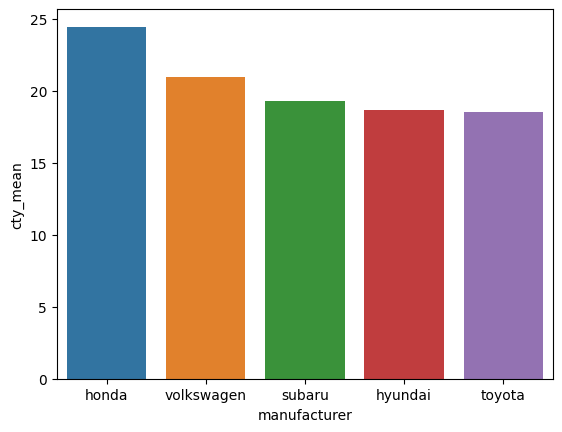

In [25]:
suv = mpg[mpg['category'] == 'suv']
top5_mean_cty = mpg.groupby('manufacturer', as_index = False).agg(cty_mean = ('cty','mean'))\
.sort_values('cty_mean', ascending = False).head()

sns.barplot(data = top5_mean_cty, x = 'manufacturer', y = 'cty_mean')


In [31]:
mc=mpg.groupby('category').mean()

C:\Users\zxcsu\AppData\Local\Temp\ipykernel_29820\2337241527.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mc=mpg.groupby('category').mean()


In [32]:
mc.head()

,displ,year,cyl,cty,hwy
category,,,,,
2seater,6.160000,2004.400000,8.000000,15.400000,24.800000
compact,2.325532,2003.212766,4.595745,20.127660,28.297872
midsize,2.921951,2003.609756,5.317073,18.756098,27.292683
minivan,3.390909,2003.090909,5.818182,15.818182,22.363636
pickup,4.418182,2003.636364,7.030303,13.000000,16.878788


In [36]:
cat = mpg.groupby('category',as_index = False).agg(count = ('category','count'))\
.sort_values('count', ascending = False)
cat


,category,count
6,suv,62
1,compact,47
2,midsize,41
5,subcompact,35
4,pickup,33
3,minivan,11
0,2seater,5


<AxesSubplot: xlabel='category', ylabel='count'>

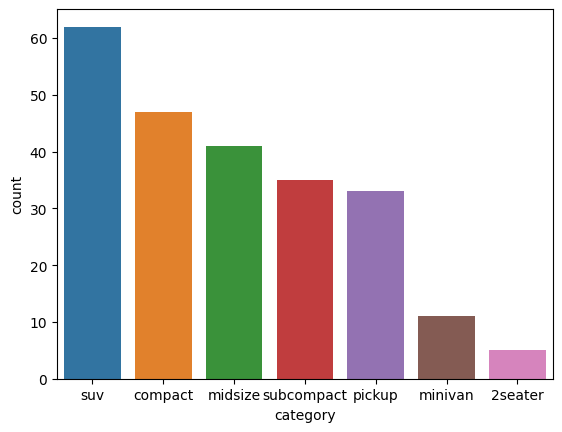

In [37]:
sns.barplot(data = cat, x = 'category', y = 'count')
